# Wrangle & Analyze Data


## Contents

<a href="#gather">Gather Data</a>
    <ol>
        <li><a href="#gather_archive">Enhanced Twitter Archive</a></li>
        <li><a href="#gather_predictions">Image Predictions File</a></li>
        <li><a href="#gather_json_data">Twitter API</a></li>
    </ol>

<a href="#assess">Assess Data:</a>

<a href="#visual">A-Visual Assessment:</a>
   <ul>
        <li><a href="#visual_archive">_**`archive`**_ </a></li>
        <li><a href="#visual_predictions"> _**`predictions`**_</a></li>
        <li><a href="#visual_json_data">_**`json_data`**_</a></li>
    </ul>

<a href="#prog">B-Programmatic Assessment:</a>
    <ul>
        <li><a href="#prog_archive"> _**`archive`**_</a></li>
        <li><a href="#prog_predictions">_**`predictions`**_</a></li>
        <li><a href="#prog_json_data">_**`json_data`**_</a></li>
    </ul>

<a href="#summary">Assessment Summery</a>

<a href="#clean">Clean Data</a>

<a href="#store">Store Data</a>

<a href="#analyze">Analyze Data</a>

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import requests
import tweepy
import json

import matplotlib.pyplot as plt
%matplotlib inline


---
<a id='gather'></a>
# Gather Data
_Gather each of the three pieces of data :_
1. **Twitter archive file**

downloaded manually

2. **The tweet image predictions**

downloaded programmatically using the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. **Twitter API** 

Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data 

---
<a id='gather_archive'></a>
## 1. Enhanced Twitter Archive

In [2]:
#Read CSV file 
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

---
<a id='gather_predictions'></a>
## 2. Image Predictions File

In [3]:
#URL downloaded programatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

---
<a id='gather_json_data'></a>
## 3. Twitter API

In [4]:
#Read tweet_json.txt file line by line, add each into list
df_list = []
with open('tweet_json.txt') as file:
    for line in file :
        df_list.append(json.loads(line))

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
df_list = []

with open('tweet_json.txt') as file:
    for line in file :
        df_list.append(json.loads(line))

In [6]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
#Create pandas DataFrame 
json_data = pd.DataFrame(df_list, columns = ['id',
                                              'retweet_count',
                                              'favorite_count'])
json_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
#Changing the name of column'id' to 'tweet_id'
json_data = json_data.rename(columns = {'id':'tweet_id'})
json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
#Saving the Dataframe to csv file for future use
#(without index column so it willnot appear as unnamed column in the file)
json_data.to_csv('json_data.csv', index = False)

---
<a id='assess'></a>
# Assess Data:

In [10]:
# Load the data gathered data files
archive = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
json_data = pd.read_csv('json_data.csv')

---
<a id='visual'></a>

## A- Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

---
<a id='visual_archive'></a>
## _**`archive`**_

In [11]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


<a id='visual_predictions'></a>
## _**`predictions`**_

In [12]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
#display predictions dataframe by saving to csv file for visual assessment
predictions.to_csv('predictions.csv', index = False)

---
<a id='visual_json_data'></a>

### _**`json_data`**_


In [14]:
json_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


_**Visual Assessment**_ show some issues in each piece of data:

## `archive`
### Quality
- The **name** column has invalid names like "a", "in" and "an".

- There are missing data in **name** and **expanded_urls** columns.

- The **Key Points** indicates that we’re only interested in "original tweets", no "retweets"which stored in the columns **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**,

- "reply tweets" are also not "original tweets" which stored in the columns **in_reply_to_status_id, in_reply_to_user_id**.

### Tidiness

- There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**). The 4 columns for one variable doesn't conform to the rules of "tidy data". 

- column **rating_denominator**s is no longer needed because they are of the same 10 (not variable).


## `predictions`

### Quality:

- There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".


### Tidness:

- The table does not follow the rules of “Tidy Data”; the columns **p1**, **p2** and **p3** contain the same type of data, predictions. The columns **p1_conf**, **p2_conf** and **p3_conf** all contain values for confidence level, and columns **p1_dog**, **p2_dog** and **p3_dog** all contain Boolean values indicating whether the prediction is in fact a type of dog.


## `json_data`

### Tidness:


- All data are related but devided into 3 separate dataframes

---
<a id='prog'></a>

## Programmatic assessment

Pandas' functions and/or methods are used to assess the data.

---
<a id='prog_archive'></a>
## _**`archive`**_

In [15]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**_`info()`_** method shows us many issues:

### Quality:

- There are 181 retweets as indicated by (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**).
 
- **timestamp** data type is invalid (string not datetime)

- There are 2297 tweets with **expanded_urls** (links to tweets) indicating 59 tweets with missing data
 
- There are 78 reply tweets (**in_reply_to_status_id, in_reply_to_user_id**)
 
### Tidness:
- There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**)


In [16]:
sum(archive['tweet_id'].duplicated())

0

In [17]:
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


 The _**`head()`**_ and _**`tail()`**_ methods show us several issues:

### Quality:
 - The **timestamp** column has dates in string form.
 - Some of the rows from the `tail()` output above have invalid strings in the **name** column, e.g. "a", "an", "in". 
 - Values of "None" in the **name** column.

In [19]:
#First we will check the 'name' column, starting with value counts.
archive.name.value_counts().head(50)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
the          8
Buddy        7
an           7
Toby         7
Bailey       7
Daisy        7
Oscar        6
Milo         6
Scout        6
Koda         6
Jack         6
Bella        6
Stanley      6
Dave         6
Jax          6
Leo          6
Rusty        6
Bentley      5
Louis        5
Sammy        5
George       5
Finn         5
Gus          5
Phil         5
Alfie        5
Larry        5
Oakley       5
Sunny        5
very         5
Chester      5
Boomer       4
Bruce        4
Gary         4
Maggie       4
Carl         4
one          4
Dexter       4
Jerry        4
Name: name, dtype: int64

### Quality:
- the dog names are all capitalized, so words that begin in lowercase are probably not names.

In [20]:
# list all names that are NOT capitalized
err_names_mask = archive.name.str.contains('^[a-z]', regex = True)
archive[err_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [21]:
len(archive[err_names_mask])

109

### Quality:

- This list contains non-capitalized words from the **name** column for 109 tweets, none of which are a valid name.

In [22]:
#Check the tweets that are missing data in `expanded_urls`
#Number of tweets with missing urls
sum(archive.expanded_urls.isna())

59

In [23]:
#Find tweets with missing urls which are replies or retweets
sum(archive.expanded_urls.isna() & \
    (archive.in_reply_to_status_id.notnull() | \
     archive.retweeted_status_id.notnull()))

56

In [24]:
#Tweets that are missing urls and are NOT replies and are NOT retweets
mask = archive.expanded_urls.isna() & \
       archive.in_reply_to_status_id.isna() & \
       archive.retweeted_status_id.isna()
archive[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


### Quality
There are 2297 tweets with **expanded_urls** (links to the tweet), indicating 59 tweets with missing data:
   1. 56 of these tweets are replies or retweets.
   2. The remaining 3 tweets have not got the url within the **text** column.

In [25]:
#`rating_numerator` and `rating_denominator`
archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


_**`describe()`**_ method shows us some issues:

### Quality

- The max values are huge: 1776, 170.
 
- The minimum is 0 for both.

In [26]:
archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
sum(archive.rating_denominator != 10)

23

In [28]:
#It's interesting that many of the larger numbers are multiples of 10.
#When looking at some of those tweets we see that there is more than 1 dog in the photo. 
#Ignoring the retweets and replies, we display tweets 
#that do NOT have denominator of 10, and are NOT replies and are NOT retweets
mask_find = (archive.rating_denominator != 10) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [29]:
sum(mask_find)

17

**_`rating_denominator`_** show us an issue of 

### Quality
-There are 17 tweets with denominators that aren't 10, ignoring the replies and retweets.

-Many of these which are multiples of 10 are about multiple dogs, and the text indicates this, like "floofs", "puppers", "squad" and "pups"

In [30]:
#doggo, floofer, pupper, and puppo
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [31]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [32]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [33]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

---
<a id='prog_predictions'></a>

## _**`predictions`**_

In [34]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [36]:
predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False
1945,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,True,Pomeranian,0.270648,True,Pekinese,0.038110,True
300,671488513339211776,https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg,1,hermit_crab,0.528761,False,snail,0.185644,False,shower_curtain,0.066361,False
1603,800141422401830912,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
212,670037189829525505,https://pbs.twimg.com/media/CUxzQ-nWIAAgJUm.jpg,1,pot,0.273767,False,tray,0.092888,False,doormat,0.050728,False
1688,815390420867969024,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
1804,832215726631055365,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
576,678675843183484930,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,maze,0.339850,False,streetcar,0.099688,False,sundial,0.084808,False
838,694352839993344000,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich_terrier,0.419838,True,cairn,0.351876,True,Norfolk_terrier,0.051094,True


In [37]:
sum(predictions.jpg_url.duplicated())

66

**_`duplicated()`_** show us an issue of :

### Quality
- there are 66 duplicated urls.

In [38]:
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [39]:
print(predictions.p1_dog.value_counts())
print(predictions.p2_dog.value_counts())
print(predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


---
<a id='prog_json_data'></a>

## _**`json_data`**_


In [40]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [41]:
json_data.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [42]:
json_data.sample(10)

,tweet_id,retweet_count,favorite_count
256,843856843873095681,5220,23211
393,825829644528148480,2848,14025
1547,689255633275777024,1212,2805
2140,669972011175813120,175,471
1581,687102708889812993,1124,2571
2008,672248013293752320,656,1833
26,886736880519319552,3443,12306
1126,729823566028484608,1390,4358
599,798673117451325440,6485,0
328,833479644947025920,2357,16258


In [43]:
json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [44]:
json_data.sample(10)

,tweet_id,retweet_count,favorite_count
2022,671891728106971137,618,1415
2280,667211855547486208,258,516
313,835172783151792128,6516,28552
764,777885040357281792,1893,7078
1965,673342308415348736,649,1362
1786,677557565589463040,1322,2665
1321,706265994973601792,1030,2979
192,855459453768019968,8987,31657
1572,687480748861947905,281,1760
809,771380798096281600,5912,11746


<a id='summary'></a>

---
# Assessment issues

## Quality

### _**`archive`**_

<a href="#clean_q1">1.</a> There are 181 retweets which are not original tweets, indicated by (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**). 

<a href="#clean_q2">2.</a> There are 78 reply tweets which are not original tweets (**in_reply_to_status_id, in_reply_to_user_id**).

<a href="#clean_q3">3.</a> There are 2297 tweets with **expanded_urls** (links to the tweet), indicating 59 tweets with missing data:

     A.56 of these tweets are replies or retweets.
     B.The remaining 3 tweets have not got the url within the **text** column.

<a href="#clean_q4">4.</a> **timestamp** data type is invalid (string not datetime).

<a href="#clean_q5">5.</a> There are 109 tweets with regular words in the **name** column that are NOT a valid name; these words are all lowercase; all valid names start with an uppercase letter.

6. There are 775 tweets with the dog **name** as "None".(Probably not worth looking at as there are too many to verify. So, This issue will not be cleaned.)

<a href="#clean_q7">7.</a> Ignoring replies and retweets, there are 17 tweets with **rating_denominator** NOT equal to 10:

 <a href="#clean_q7-1">A.</a> 4 tweets have the correct rating within the text, and can be manually fixed.
  
 <a href="#clean_q7-2">B.</a> 13 are about multiple dogs/pups, and can be dropped.


### _**`predictions`**_

<a href="#clean_q8">8.</a> there are 66 duplicated urls. 

<a href="#clean_q9">9.</a> There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".   


## Tidiness

### _**`archive`**_
<a href="#clean_t1">1.</a> There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**)

<a href="#clean_t2">2.</a> When all **rating_denominator**s are the same (10) this column is no longer needed. 

### _**`predictions`**_

<a href="#clean_t3">3.</a> The table does not follow the rules of “Tidy Data”; the columns **p1**, **p2** and **p3** contain the same type of data, predictions. The columns **p1_conf**, **p2_conf** and **p3_conf** all contain values for confidence level, and columns **p1_dog**, **p2_dog** and **p3_dog** all contain Boolean values indicating whether the prediction is in fact a type of dog.  

### _**`json_data`**_
<a href="#clean_t4">4.</a> All data are related but devided into 3 separate dataframes 


<a id='clean'></a>

---
# Clean Data

In [45]:
# create copies of the dataframes for cleaning
archive_clean = archive.copy()
predictions_clean = predictions.copy()
json_data_clean = json_data.copy()

In [46]:
len_archive = archive_clean.shape[0]; len_archive

2356

---
<a id='clean_q1'></a>
## Quality

### _**`archive`**_

1.There are 181 retweets which are not original tweets, indicated by (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**).

### Define
Drop all rows containing retweets, where these columns will be non-null: **retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp**. 

### Code

In [47]:
print(sum(archive_clean.retweeted_status_id.notnull()))

181


In [48]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

### Test

In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [50]:
# confirm the rows are dropped; compare with original table length
print(len_archive - archive_clean.shape[0])
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

181


---
<a id='clean_q2'></a>

### _**`archive`**_

2.There are 78 reply tweets which are not original tweets (**in_reply_to_status_id, in_reply_to_user_id**).

### Define
Drop all rows that are replies, those that have non-null values in these columns: **in_reply_to_status_id and in_reply_to_user_id**
### Code

In [51]:
print(sum(archive_clean.in_reply_to_status_id.notnull()))

78


In [52]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

### Test

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [54]:
# confirm the rows are dropped; compare with previous table length
print(len_archive - archive_clean.shape[0])
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

78


In [55]:
#drop all columns related to retweets: 
#`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`,
# `in_reply_to_status_id` and `in_reply_to_user_id`.
archive_clean = archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

In [56]:
# Confirm all retweet related columns are gone
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

---
<a id='clean_q3'></a>
### _**`archive`**_

3.There are 2297 tweets with **expanded_urls** (links to the tweet), indicating 59 tweets with missing data:

     A. 56 of these tweets are replies or retweets.(Just resolved above)
     B. The remaining 3 tweets have not got the url within the **text** column.


### Define
Drop tweets with missing data in the **expanded_urls**.
### Code

In [57]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

### Test

In [58]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


---
<a id='clean_q4'></a>
### _**`archive`**_

4.**timestamp** data type is invalid (string not datetime).
### Define
Convert **timestamp** to datetime data type.
### Code

In [59]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)
archive_clean['timestamp'] = archive_clean.timestamp.dt.floor('s')

### Test


In [60]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

---
<a id='clean_q5'></a>
### _**`archive`**_

5.There are 109 tweets with regular words in the **name** column that are NOT a valid name; these words are all lowercase; all valid names start with an uppercase letter.


### Define
Replace all lowercase words in the **name** column with the string "none".
### Code

In [61]:
names_mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [62]:
archive_clean.loc[names_mask, 'name'] = "none"

### Test

In [63]:
# All these entries were changed to "none"
archive_clean[names_mask].name.value_counts().sort_index()

none    104
Name: name, dtype: int64

---
<a id='clean_q7'></a>
### _**`archive`**_

7.Ignoring replies and retweets, there are 17 tweets with **rating_denominator** NOT equal to 10:


<a id='clean_q7-1'></a>
  A. 4 tweets have the correct rating within the text, and can be manually fixed.
### Define
>Manual fix:
- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10

### Code

In [64]:
mask_row = archive_clean.tweet_id == 740373189193256964
archive_clean.loc[mask_row, 'rating_numerator'] = 14
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [65]:
mask_row = archive_clean.tweet_id == 716439118184652801
archive_clean.loc[mask_row, 'rating_numerator'] = 11
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [66]:
mask_row = archive_clean.tweet_id == 682962037429899265
archive_clean.loc[mask_row, 'rating_numerator'] = 10
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [67]:
mask_row = archive_clean.tweet_id == 666287406224695296
archive_clean.loc[mask_row, 'rating_numerator'] = 9
archive_clean.loc[mask_row, 'rating_denominator'] = 10

### Test

In [68]:
mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive_clean[(archive_clean.tweet_id == 740373189193256964) | \
              (archive_clean.tweet_id == 716439118184652801) | \
              (archive_clean.tweet_id == 682962037429899265) | \
              (archive_clean.tweet_id == 666287406224695296) ][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14,10
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9,10


---
<a id='clean_q7-2'></a>
B. 13 are about multiple dogs/pups, and can be dropped.

### Define
Drop the remaining tweets with **rating_denominator** NOT equal to 10:
### Code

In [69]:
# display denominators
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        2
40        1
20        1
10     2081
7         1
Name: rating_denominator, dtype: int64

In [70]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

### Test

In [71]:
# check the values in the column - should only be "10"
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2081
Name: rating_denominator, dtype: int64

---
<a id='clean_q8'></a>
### _**`predictions`**_

8.there are 66 duplicated urls.
### Define 
Drop 66 **jpg_url** duplicated.

### Code

In [72]:
predictions_clean = predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test

In [73]:
sum(predictions_clean['jpg_url'].duplicated())

0

---
<a id='clean_t1'></a>
## Tidiness

### _**`archive`**_
1.There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**) 


### Define
 Melt the 4 columns with the dog stages:
 - Create a temporary column called `none` to store the `None` values; use lowercase 'n' to avoid confusion with 'None' special NA value.
 - Create a new column `stage` to store the categories: `doggo`, `floofer`, `pupper`, `puppo`, as well as `None`, and select the stage from the column that contains a value.
 - Cast the `stage` column to categorical data type.
 - Drop the 4 original dog stage columns, and the temporary `none` column.

### Code

In [74]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2081,2081,2081,2081
unique,2,2,2,2
top,None,None,None,None
freq,1998,2071,1852,2057


**NOTE:**
From the describe() output here, I'm going to order the dog stages by count, in increasing order: floofer, puppo, doggo and pupper.

In [75]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(make_dummy)
archive_clean.floofer = archive_clean.floofer.apply(make_dummy)
archive_clean.pupper = archive_clean.pupper.apply(make_dummy)
archive_clean.puppo = archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

# have a look at what we have before we continue...
archive_clean['none'].value_counts()

0    1746
1     324
2      11
Name: none, dtype: int64

**NOTE:**
Here we have a little surprise! Turns out there are 11 tweets that have 2 dog stages set, so these must be tweets about multiple dogs. As there are only 11 entries, I'll just carry on with selecting the first of the dog stages in increasing count order - floofer, puppo, doggo and pupper - so we don't loose too much information.

In [76]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
archive_clean['none'] = archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1),
    (archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

### Test

In [77]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2081 non-null   int64              
 1   timestamp           2081 non-null   datetime64[ns, UTC]
 2   source              2081 non-null   object             
 3   text                2081 non-null   object             
 4   expanded_urls       2081 non-null   object             
 5   rating_numerator    2081 non-null   int64              
 6   rating_denominator  2081 non-null   int64              
 7   name                2081 non-null   object             
 8   stage               2081 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.6+ KB


In [78]:
archive_clean.stage.value_counts()

none       1746
pupper      220
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64

---
<a id='clean_t2'></a>

### _**`archive`**_
2.When all **rating_denominator**s are the same (10) this column is no longer needed. 
### Define
- Drop the `rating_denominator` column.
- Rename the `rating_numerator` column to be `rating`.

### Code

In [79]:
archive_clean.rating_denominator.value_counts()

10    2081
Name: rating_denominator, dtype: int64

In [80]:
archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

### Test

In [81]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stage']

---
<a id='clean_t3'></a>
### _**`predictions`**_

3.The table does not follow the rules of “Tidy Data”; the columns **p1**, **p2** and **p3** contain the same type of data, predictions. The columns **p1_conf**, **p2_conf** and **p3_conf** all contain values for confidence level, and columns **p1_dog**, **p2_dog** and **p3_dog** all contain Boolean values indicating whether the prediction is in fact a type of dog. 

### Define
- Create 1 column for image prediction and 1 column for confidence level
- Create a function where I keep the first true prediction along the confidence level as new columns.

### Code

In [82]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level from the first 'true' prediction
def image(predictions_clean):
    if predictions_clean['p1_dog'] == True:
        dog_type.append(predictions_clean['p1'])
        confidence_list.append(predictions_clean['p1_conf'])
    elif predictions_clean['p2_dog'] == True:
        dog_type.append(predictions_clean['p2'])
        confidence_list.append(predictions_clean['p2_conf'])
    elif predictions_clean['p3_dog'] == True:
        dog_type.append(predictions_clean['p3'])
        confidence_list.append(predictions_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the predictions_clean column.        
predictions_clean.apply(image, axis=1)

#create new columns
predictions_clean['dog_type'] = dog_type
predictions_clean['confidence_list'] = confidence_list

In [83]:
#drop rows that has prediction_list 'error'
predictions_clean = predictions_clean[predictions_clean['dog_type'] != 'Error']

### Test

In [84]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [85]:
#Delete columns that won't be used for analysis
predictions_clean = predictions_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

### Test


In [86]:
list(predictions_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

---
<a id='clean_t4'></a>

### _**`json_data`**_
4.All data are related but devided into 3 separate dataframes 

### Define
 All tables should be part of one dataset

### Code

In [87]:
#create a new dataframe that merge archive_clean and predictions_clean
df_twitter1 = pd.merge(archive_clean, 
                      predictions_clean, 
                      how = 'left', on = ['tweet_id'])

### Test

In [88]:
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 2080
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2081 non-null   int64              
 1   timestamp        2081 non-null   datetime64[ns, UTC]
 2   source           2081 non-null   object             
 3   text             2081 non-null   object             
 4   expanded_urls    2081 non-null   object             
 5   rating           2081 non-null   int64              
 6   name             2081 non-null   object             
 7   stage            2081 non-null   category           
 8   jpg_url          1594 non-null   object             
 9   dog_type         1594 non-null   object             
 10  confidence_list  1594 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 181.1+ KB


In [89]:
#create a new dataframe that merge df_twitter1 and json_data_clean
df_twitter = pd.merge(df_twitter1, json_data_clean, 
                      how = 'left', on = ['tweet_id'])

### Test

In [90]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 2080
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2081 non-null   int64              
 1   timestamp        2081 non-null   datetime64[ns, UTC]
 2   source           2081 non-null   object             
 3   text             2081 non-null   object             
 4   expanded_urls    2081 non-null   object             
 5   rating           2081 non-null   int64              
 6   name             2081 non-null   object             
 7   stage            2081 non-null   category           
 8   jpg_url          1594 non-null   object             
 9   dog_type         1594 non-null   object             
 10  confidence_list  1594 non-null   object             
 11  retweet_count    2081 non-null   int64              
 12  favorite_count   2081 non-null   int64              
dtypes: category(1), da

<a id='clean_q9'></a>
### _**`predictions`**_
9.There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".
### Define
keep rows that only have picture
### Code

In [91]:
df_twitter = df_twitter[df_twitter['jpg_url'].notnull()]

### Test

In [92]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 1 to 2080
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         1594 non-null   int64              
 1   timestamp        1594 non-null   datetime64[ns, UTC]
 2   source           1594 non-null   object             
 3   text             1594 non-null   object             
 4   expanded_urls    1594 non-null   object             
 5   rating           1594 non-null   int64              
 6   name             1594 non-null   object             
 7   stage            1594 non-null   category           
 8   jpg_url          1594 non-null   object             
 9   dog_type         1594 non-null   object             
 10  confidence_list  1594 non-null   object             
 11  retweet_count    1594 non-null   int64              
 12  favorite_count   1594 non-null   int64              
dtypes: category(1), da

In [93]:
df_twitter['rating'].value_counts()

12    402
10    352
11    339
13    203
9     132
8      68
7      31
14     20
6      16
5      14
4       6
3       5
2       2
27      1
0       1
26      1
75      1
Name: rating, dtype: int64

---
<a id='store'></a>
# Store Data

In [94]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

---
<a id='analyze'></a>
# Analyze Data

### **Most common dog type**

In [107]:
df_twitter['dog_type'].value_counts()

golden_retriever        139
Labrador_retriever       98
Pembroke                 93
Chihuahua                86
pug                      60
                       ... 
Irish_wolfhound           1
silky_terrier             1
Bouvier_des_Flandres      1
EntleBucher               1
clumber                   1
Name: dog_type, Length: 113, dtype: int64

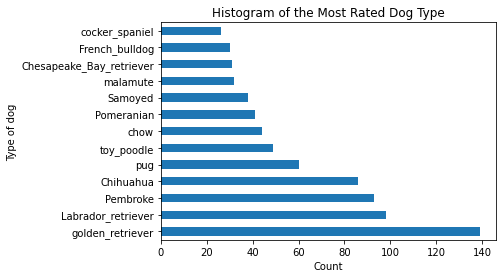

In [108]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [109]:
print(df_twitter.loc[df_twitter.dog_type == 'golden_retriever', 'jpg_url']) 

14      https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
16      https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
17      https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
41      https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
43      https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg
                             ...                       
2018    https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg
2026    https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg
2057    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg
2070    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
2072    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg
Name: jpg_url, Length: 139, dtype: object


## insight
- **Golden_retriever** is the most common dog in this dataset.

### value_counts of different dog stage

In [110]:
df_stage = df_twitter.stage.value_counts()
df_stage

none       1346
pupper      163
doggo        56
puppo        21
floofer       8
Name: stage, dtype: int64

## Insight
- **pupper** is the highest dog stage
- **floofer** is the lowest dog stage

### Relationship between retweet_count and favorite_count

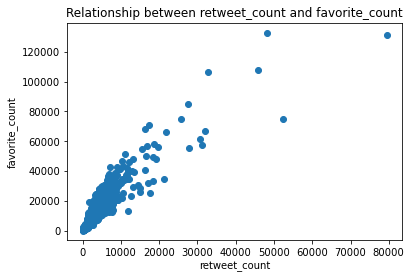

In [111]:
plt.scatter(df_twitter.retweet_count, df_twitter.favorite_count)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Relationship between retweet_count and favorite_count')

fig = plt.gcf() 
fig.savefig('output1.png',bbox_inches='tight');

## Insight
- there is linear relationship between **retweet_count** and **favorite_count**.

### The highest AND lowest average rating

In [112]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [113]:
df_dog_type_mean.head()

,tweet_id,rating,retweet_count,favorite_count
dog_type,,,,
Afghan_hound,8.095999e+17,8.000000,3602.5000,12191.500000
Airedale,7.184489e+17,9.833333,1393.7500,5280.833333
American_Staffordshire_terrier,7.597284e+17,10.312500,2310.8125,9380.187500
Appenzeller,7.939334e+17,11.000000,1458.0000,7317.500000
Australian_terrier,7.785921e+17,11.500000,3078.5000,11127.500000


In [114]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

dog_type
Japanese_spaniel                5.000000
Afghan_hound                    8.000000
soft-coated_wheaten_terrier     8.166667
Walker_hound                    9.000000
Scotch_terrier                  9.000000
                                 ...    
briard                         12.333333
Saluki                         12.500000
Pomeranian                     12.536585
Bouvier_des_Flandres           13.000000
clumber                        27.000000
Name: rating, Length: 113, dtype: float64

## Insight
- **Japanese_spaniel**_ has the lowest average rating
- **clumber**_ has the highest average rating

In [115]:
print(df_twitter.loc[df_twitter.dog_type == 'Japanese_spaniel', 'jpg_url']) 

1542    https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg
Name: jpg_url, dtype: object


In [116]:
print(df_twitter.loc[df_twitter.dog_type == 'Bouvier_des_Flandres', 'jpg_url']) 

132    https://pbs.twimg.com/ext_tw_video_thumb/86128...
Name: jpg_url, dtype: object


### Relationship between rating and favorite_count

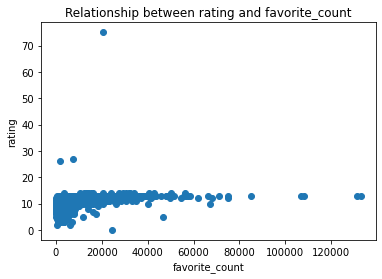

In [117]:
plt.scatter(df_twitter.favorite_count, df_twitter.rating)
plt.xlabel('favorite_count')
plt.ylabel('rating')
plt.title('Relationship between rating and favorite_count')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

### Relationship between rating and retweet_count

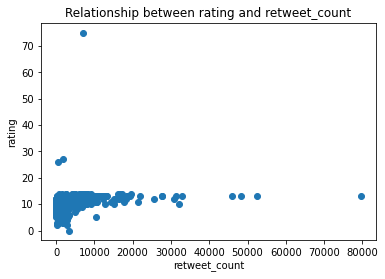

In [118]:
plt.scatter(df_twitter.retweet_count, df_twitter.rating)
plt.xlabel('retweet_count')
plt.ylabel('rating')
plt.title('Relationship between rating and retweet_count')

fig = plt.gcf()
fig.savefig('output4.png',bbox_inches='tight');

## Insight
- The highest ratings do not receive the most favourites or retweets. 